# My question is what the probability that a randomly selected movie has a popularity score above 1.0 is.
# First, let's find the theoretical probability, using a dataset of 1,000 random movies previously collected.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st

movies_df = pd.read_csv("movies_data.csv")
print("Read finished.")

mean = movies_df['popularity'].mean()
stddev = movies_df['popularity'].std(ddof=1)  # Assume a sample

print("Calculated mean:", mean)
print("Calculated standard deviation:", stddev)
print("Theoretical probability:", 1 - st.norm.cdf((1 - mean) / stddev))

Read finished.
Calculated mean: 0.8205144
Calculated standard deviation: 2.373497213180081
Theoretical probability: 0.4698604204101626


# Now, let's find the empirical probability by inspecting every movie in the df, and grouping them into samples of 5.
# We will then calculate the empirical probability for each sample, and find the mean based on that.

In [9]:
import math

sample_size = 10
num_samples = math.ceil(len(movies_df) / sample_size)
samples = []

count_above_one = 0

for i in range(num_samples):
    sample = movies_df['popularity'][i * sample_size : (i + 1) * sample_size]
    samples.append(sample.values)
    count_above_one += (sample > 1).sum()

# Convert list of samples into a DataFrame for easy plotting
samples_df = pd.DataFrame(samples, columns=[f"movie_{i+1}" for i in range(sample_size)])

print("Empirical probability (static):", count_above_one / 1000)
print("Empirical probability (dynamic):", count_above_one / len(movies_df['popularity']))
# If the two above probabilities are not the same, reject programming and return to monke

Empirical probability (static): 0.265
Empirical probability (dynamic): 0.265


# Now, let's create a histogram to check for normality.

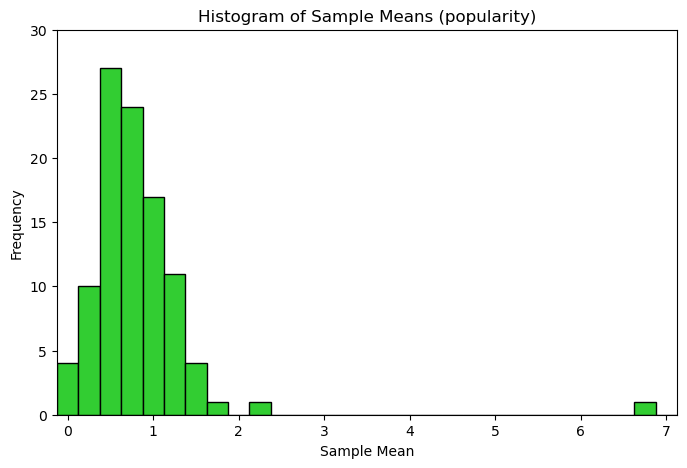

In [23]:
import matplotlib.pyplot as plt

# Compute the mean of each sample (row-wise)
sample_means = samples_df.mean(axis=1)

# Plot histogram of sample means
plt.figure(figsize=(8, 5))
plt.hist(sample_means, bins=29, range=(-0.125, 7.125), color='limegreen', edgecolor='black')
plt.title("Histogram of Sample Means (popularity)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.xlim(-0.125, 7.125)
plt.ylim(0, 30)
plt.show()

# As we can see, this is a normal distribution.